<a href="https://colab.research.google.com/github/sahmuskan17/Netflix-Data-Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Data Analysis





Importing Libraries And Data

In [89]:
import numpy as np # linear algebric operation
import pandas as pd # data preparation
import matplotlib.pyplot as plt # data visualisation
import plotly.express as px # data visualisation
from textblob import TextBlob # for sentiment analysis
import seaborn as sns
df = pd.read_csv('/content/netflix_titles.csv')

In [2]:
df.shape # checking no of rows and columns in data

(8807, 12)

In [3]:
df.head() #checking content available in the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.isnull().sum() #checking null values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

There are null values in dataset so we replace the null values

In [27]:
df['director'] = df['director'].fillna('Director not specified') # replacing the null values in director columns with ' Director not specified'

In [68]:
df['cast'] = df['cast'].fillna('No cast specified') # replacing the null values in cast columns with 'No cast specified'
df['country'] = df['country'].fillna('Not mentioned') # replacing the null values in cast columns with 'Not mentioned'

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.columns #showing column names

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Ratings

In [15]:
# Counting the occurrences of each rating
x = df.groupby(['rating']).size().reset_index(name = 'counts')
x


,rating,counts
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160


In [18]:
# Creating a pie chart using Plotly
piechart= fig = px.pie(x, values='counts', names='rating', title='Distribution of Ratings on Netflix')
piechart.show()

The rating "TV-MA" holds the highest percentage at 36.4%.

## Analysing Top 5 Directors

In [30]:
# Creating a list of dataframes for each director
director_list = pd.DataFrame()
director_list = df['director'].str.split(',', expand = True).stack()
director_list = director_list.to_frame()
director_list


,,0
0,0,Kirsten Johnson
1,0,Director not specified
2,0,Julien Leclercq
3,0,Director not specified
4,0,Director not specified
...,...,...
8802,0,David Fincher
8803,0,Director not specified
8804,0,Ruben Fleischer
8805,0,Peter Hewitt


In [31]:
# Lets name the column as 'Director'
director_list.columns = ['Director']
print(director_list)

                      Director
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [33]:
# Total counts of director
directors = director_list.groupby(['Director']).size().reset_index(name = 'Total count')
directors

,Director,Total count
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
5116,Çagan Irmak,1
5117,Ísold Uggadóttir,1
5118,Óskar Thór Axelsson,1
5119,Ömer Faruk Sorak,2


In [34]:
# As we dont want 'Director not specified' in our charts, so we can remove them
directors = directors[directors.Director!= 'Director not specified']
directors

,Director,Total count
0,Aaron Moorhead,2
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
5116,Çagan Irmak,1
5117,Ísold Uggadóttir,1
5118,Óskar Thór Axelsson,1
5119,Ömer Faruk Sorak,2


In [35]:
# Sorting in descending order
directors = directors.sort_values(by =['Total count'], ascending = False)
directors

,Director,Total count
4021,Rajiv Chilaka,22
4068,Raúl Campos,18
261,Jan Suter,18
4652,Suhas Kadav,16
3236,Marcus Raboy,16
...,...,...
2341,J. Davis,1
2342,J. Lee Thompson,1
2343,J. Michael Long,1
609,Smriti Keshari,1


In [36]:
# Top 5 Directors
top_5 = directors.head(5)
top_5

,Director,Total count
4021,Rajiv Chilaka,22
4068,Raúl Campos,18
261,Jan Suter,18
4652,Suhas Kadav,16
3236,Marcus Raboy,16


In [43]:
#creating a bar chart
top_5 = top_5.sort_values(by =['Total count'])
barchart = px.bar(top_5,x = 'Total count', y = 'Director', title = 'Top 5 Directors on Netflix')
barchart

## Analyzing Top 5 Actor on Netflix

In [56]:
cast_df = pd.DataFrame()
cast_df = df['cast'].str.split(',',expand = True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']
actor = cast_df.groupby(['Actor']).size().reset_index(name = 'Total Count')
actor = actor[actor.Actor != 'No cast specified']
actor.sort_values(by =['Total Count'],ascending = False)
top5actor = actor.head()


In [57]:
top5actor

,Actor,Total Count
0,Jr.,2
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,1
3,2 Chainz,1
4,2Mex,1


In [58]:
top5actor = top5actor.sort_values(by = ['Total Count'])
barchart2 = px.bar(top5actor, x = 'Total Count', y = 'Actor', title = 'Top 5 actor on Netflix')
barchart2.show()

## Analysing the content produced on netflix based on years

In [60]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"type":"Type", "release_year":"Release Year"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name = 'Total Count')
df2

,Release Year,Type,Total Count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


In [63]:
df2 = df2[df2['Release Year']>=2000]
graph =px.line(df2, x = 'Release Year', y = 'Total Count', color = 'Type', title = 'Trend of content produced on Netflix')
graph.show()

##### From the linechart we can see that most of the content produced during 2015-2022

## Year wise Analysis

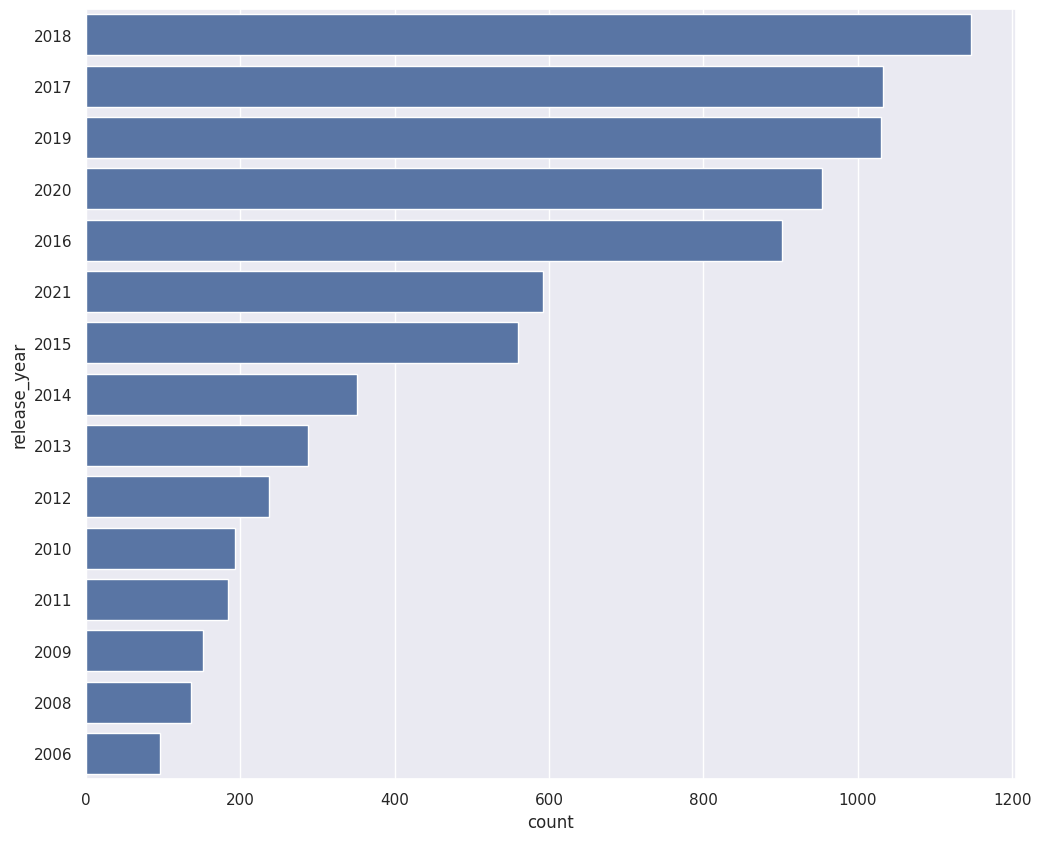

In [91]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df,  order=df['release_year'].value_counts().index[0:15])

##### So, 2018 was the year when most of the movies were released.